In [50]:
% matplotlib inline
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from  sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from figures import plot_2d_separator

In [3]:
bc=load_breast_cancer()

In [4]:
bc.keys()


['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [5]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [6]:
bc.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [7]:
bc.target_names

array(['malignant', 'benign'], 
      dtype='|S9')

In [8]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [10]:
x=bc.data

In [11]:
x

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [16]:
X=x[:,0:2]

In [17]:
X

array([[ 17.99,  10.38],
       [ 20.57,  17.77],
       [ 19.69,  21.25],
       ..., 
       [ 16.6 ,  28.08],
       [ 20.6 ,  29.33],
       [  7.76,  24.54]])

In [18]:
Y=bc.target

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [22]:
x_train


array([[ 11.45 ,  20.97 ],
       [  9.667,  18.49 ],
       [ 16.3  ,  15.7  ],
       [ 15.19 ,  13.21 ],
       [ 23.29 ,  26.67 ],
       [ 14.42 ,  16.54 ],
       [ 12.49 ,  16.85 ],
       [ 19.8  ,  21.56 ],
       [ 16.46 ,  20.11 ],
       [ 12.03 ,  17.93 ],
       [ 12.85 ,  21.37 ],
       [ 11.71 ,  15.45 ],
       [ 12.1  ,  17.72 ],
       [ 11.41 ,  14.92 ],
       [ 12.91 ,  16.33 ],
       [ 12.46 ,  12.83 ],
       [ 10.91 ,  12.35 ],
       [  9.742,  15.67 ],
       [ 18.05 ,  16.15 ],
       [ 14.92 ,  14.93 ],
       [  9.738,  11.97 ],
       [ 18.45 ,  21.91 ],
       [ 13.9  ,  16.62 ],
       [ 11.29 ,  13.04 ],
       [ 13.45 ,  18.3  ],
       [ 10.44 ,  15.46 ],
       [ 12.65 ,  18.17 ],
       [ 15.61 ,  19.38 ],
       [ 10.32 ,  16.35 ],
       [ 12.62 ,  17.15 ],
       [ 12.45 ,  15.7  ],
       [ 14.71 ,  21.59 ],
       [ 13.87 ,  16.21 ],
       [ 21.61 ,  22.28 ],
       [ 21.1  ,  20.52 ],
       [ 12.62 ,  23.97 ],
       [ 21.37 ,  15.1  ],
 

In [23]:
x_test

array([[ 20.18 ,  23.97 ],
       [ 11.26 ,  19.96 ],
       [ 13.28 ,  13.72 ],
       [ 14.54 ,  27.54 ],
       [  9.847,  15.68 ],
       [ 11.76 ,  18.14 ],
       [ 22.01 ,  21.9  ],
       [ 13.7  ,  17.64 ],
       [ 16.13 ,  20.68 ],
       [ 11.28 ,  13.39 ],
       [ 15.78 ,  22.91 ],
       [ 12.77 ,  21.41 ],
       [  9.742,  19.12 ],
       [ 11.75 ,  17.56 ],
       [ 12.04 ,  28.14 ],
       [ 11.49 ,  14.59 ],
       [ 11.71 ,  17.19 ],
       [ 10.51 ,  23.09 ],
       [ 19.   ,  18.91 ],
       [ 14.69 ,  13.98 ],
       [ 11.8  ,  16.58 ],
       [ 19.79 ,  25.12 ],
       [ 14.25 ,  22.15 ],
       [ 16.14 ,  14.86 ],
       [ 12.83 ,  15.73 ],
       [ 15.1  ,  16.39 ],
       [ 13.77 ,  22.29 ],
       [ 11.87 ,  21.54 ],
       [ 10.66 ,  15.15 ],
       [ 14.47 ,  24.99 ],
       [ 16.27 ,  20.71 ],
       [ 16.26 ,  21.88 ],
       [ 10.25 ,  16.18 ],
       [ 16.11 ,  18.05 ],
       [ 13.75 ,  23.77 ],
       [ 20.48 ,  21.46 ],
       [ 10.8  ,   9.71 ],
 

In [65]:
classifier=KNeighborsClassifier(n_neighbors=4)

In [66]:
model=classifier.fit(x_train,y_train)

In [67]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [68]:
model.score(x_test,y_test)

0.8601398601398601

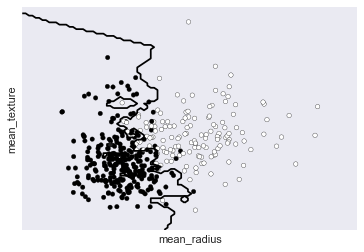

In [64]:
print(plt.scatter(x_train[:,0],x_train[:,1],c=y_train))
plt.xlabel("mean_radius")
plt.ylabel("mean_texture")
plot_2d_separator.plot_2d_separator(model,X)

<module 'matplotlib.pyplot' from '/home/veereshhr/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>